In [415]:
#### LIBRERIAS A UTILIZAR####

In [636]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report

#required for grahical representation purpose
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
 
%matplotlib inline
 
#required for parameter tuning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [417]:
#### IIMPORTAR DATOS ####

In [637]:
datos_de_prueba= pd.read_csv('C:/Users/PC/Downloads/UNAD/Analisis de Datos/Tarea 3/Dataset_Titanic/test.csv')
datos_de_entrenamiento= pd.read_csv('C:/Users/PC/Downloads/UNAD/Analisis de Datos/Tarea 3/Dataset_Titanic/train.csv')

In [638]:
# abrimos los archivos para obsevarlos de manera general
datos_de_entrenamiento

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [639]:
datos_de_prueba

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [640]:
# Verifico la cantidad de datos que contiene los dataset

In [641]:
print(datos_de_prueba.shape)
print(datos_de_entrenamiento.shape)

(418, 11)
(891, 12)


In [642]:
# Verifico los tipod de datos que contiene los dataset

In [643]:
print(datos_de_prueba.info())
print(datos_de_entrenamiento.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pcl

In [644]:
# # Verifico la cantidad de datos faltantes que contiene los dataset

In [645]:
print('datos de prueba:')
print(pd.isnull(datos_de_prueba).sum())
print('datos de entrenamiento:')
print(pd.isnull(datos_de_entrenamiento).sum())

datos de prueba:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
datos de entrenamiento:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [646]:
# Verificamos las estadisticas de los dataset

In [647]:
print('datos de prueba:')
print(datos_de_prueba.describe())
print('datos de entrenamiento:')
print(datos_de_entrenamiento.describe())

datos de prueba:
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200
datos de entrenamiento:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.83

In [648]:
datos_de_entrenamiento

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [430]:
### PREPROCESAMIENTO DE DATOS ###

In [431]:
# Cambio de los datos de sexo a numero

In [649]:
datos_de_prueba['Sex'].replace(['female','male'],[0,1],inplace=True)
datos_de_entrenamiento['Sex'].replace(['female','male'],[0,1],inplace=True)

In [433]:
# Cambio de los datos de embarque a numero

In [650]:
datos_de_prueba['Embarked'].replace(['Q','S','C'],[0,1,2],inplace=True)
datos_de_entrenamiento['Embarked'].replace(['Q','S','C'],[0,1,2],inplace=True)

In [435]:
# Reemplazar los datos flatantes en la columna edad por la media de la columna

In [651]:
print('datos de prueba:')
print(datos_de_prueba['Age'].mean())
print('datos de entrenamiento:')
print(datos_de_entrenamiento['Age'].mean())

datos de prueba:
30.272590361445783
datos de entrenamiento:
29.69911764705882


In [652]:
promedio=30

In [653]:
datos_de_prueba['Age'].replace(np.nan,promedio,inplace=True)
datos_de_entrenamiento['Age'].replace(np.nan,promedio,inplace=True)

In [439]:
# Se crean grupos de acuerdo a las bandas de las edades

In [654]:
bins=[0,8,15,18,25,40,60,100]
names=['1','2','3','4','5','6','7']
datos_de_prueba['Age']=pd.cut(datos_de_prueba['Age'],bins,labels=names)
datos_de_entrenamiento['Age']=pd.cut(datos_de_entrenamiento['Age'],bins,labels=names)


In [441]:
# Se eliminan la columna 'Cabin' dado que tiene muchos datos perdidos

In [655]:
datos_de_prueba.drop(['Cabin'],axis=1,inplace=True)
datos_de_entrenamiento.drop(['Cabin'],axis=1,inplace=True)

In [443]:
# Se eliminan las filas que no son necesarias para el analisis

In [656]:
datos_de_prueba=datos_de_prueba.drop(['Name','Ticket'],axis=1)
datos_de_entrenamiento=datos_de_entrenamiento.drop(['PassengerId','Name','Ticket'],axis=1)

In [657]:
# Se eliminan las filas con los datos perdidos
datos_de_prueba.dropna(axis=0, how='any', inplace=True)
datos_de_entrenamiento.dropna(axis=0, how='any', inplace=True)

In [658]:
# Se cambia el tipo de dato de algunas columnas
datos_de_entrenamiento['Age']=datos_de_entrenamiento['Age'].astype(int)
datos_de_entrenamiento['Fare']=datos_de_entrenamiento['Fare'].astype(int)
datos_de_entrenamiento['Embarked']=datos_de_entrenamiento['Embarked'].astype(int)
datos_de_prueba['Age']=datos_de_prueba['Age'].astype(int)
datos_de_prueba['Fare']=datos_de_prueba['Fare'].astype(int)
datos_de_prueba['Embarked']=datos_de_prueba['Embarked'].astype(int)

In [659]:
datos_de_entrenamiento=datos_de_entrenamiento[datos_de_entrenamiento['Age']<70]
datos_de_entrenamiento=datos_de_entrenamiento[datos_de_entrenamiento['SibSp']<70]
datos_de_entrenamiento=datos_de_entrenamiento[datos_de_entrenamiento['Fare']<400]

In [448]:
# Verifico el preprocesamiento de datos

In [660]:
print('datos de prueba:')
print(pd.isnull(datos_de_prueba).sum())
print(datos_de_prueba.shape)
print(datos_de_prueba.head())
print('datos de entrenamiento:')
print(pd.isnull(datos_de_entrenamiento).sum())
print(datos_de_entrenamiento.shape)
print(datos_de_entrenamiento.head())

datos de prueba:
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
(417, 8)
   PassengerId  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0          892       3    1    5      0      0     7         0
1          893       3    0    6      1      0     7         1
2          894       2    1    7      0      0     9         0
3          895       3    1    5      0      0     8         1
4          896       3    0    4      1      1    12         1
datos de entrenamiento:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
(886, 8)
   Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0         0       3    1    4      1      0     7         1
1         1       1    0    5      1      0    71         2
2         1       3    0    5      0      0     7         1
3         1       1    0    5      1      0    53

In [661]:
bins= [0,10,25,110]
labels = [1,2,3]
datos_de_prueba['Age'] = pd.cut(datos_de_prueba['Age'], bins=bins, labels=labels, right=False)
datos_de_entrenamiento['Age'] = pd.cut(datos_de_entrenamiento['Age'], bins=bins, labels=labels, right=False)


bins= [0,100,250,500]
labels = [1,2,3]
datos_de_prueba['Fare'] = pd.cut(datos_de_prueba['Fare'], bins=bins, labels=labels, right=False)
datos_de_entrenamiento['Fare'] = pd.cut(datos_de_entrenamiento['Fare'], bins=bins, labels=labels, right=False)


NameError: name 'pyplot' is not defined

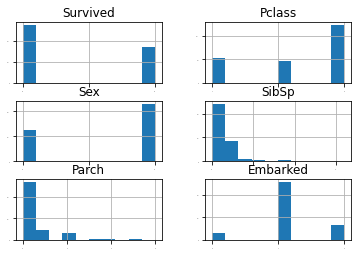

In [662]:
datos_de_entrenamiento.hist(sharex=False, sharey=False,xlabelsize=1, ylabelsize=1 )
pyplot.show()

NameError: name 'pyplot' is not defined

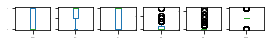

In [663]:
datos_de_entrenamiento.plot(kind= 'box' , subplots=True, layout=(8,8), sharex=False, sharey=False,
    fontsize=1)
pyplot.show()

In [664]:
datos_de_entrenamiento

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,1,1,0,1,1
1,1,1,0,1,1,0,1,2
2,1,3,0,1,0,0,1,1
3,1,1,0,1,1,0,1,1
4,0,3,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...
886,0,2,1,1,0,0,1,1
887,1,1,0,1,0,0,1,1
888,0,3,0,1,1,2,1,1
889,1,1,1,1,0,0,1,2


In [452]:
#datos_de_entrenamiento = pd.DataFrame(datos_de_entrenamiento)

In [453]:
### APLICACION DE ALGORITMOS DE MACHINE LEARNING

In [454]:
# Separo la columna con la informacion de los supervivientes en el dataset de entrenamiento

In [665]:

X= datos_de_entrenamiento.drop(['Survived'],1)
y= datos_de_entrenamiento['Survived']

<ipython-input-665-9067c5855868>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X= datos_de_entrenamiento.drop(['Survived'],1)


In [666]:
from sklearn.preprocessing import StandardScaler

#Escalar características numéricas usando sklearn StandardScalar 
standared_scaler = StandardScaler()
X = standared_scaler.fit_transform(X)

In [458]:
# Separar los datos de train en entrenamiento y prueba

In [667]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=7)

In [668]:
# Regresion Logistica
from sklearn.metrics import accuracy_score
logreg= LogisticRegression( solver='lbfgs', max_iter= 150,random_state=7).fit(X_train,y_train)
y_pred=logreg.predict(X_test)
prediction_2 = list(map(round, y_pred))
print('Presicion Regresion Logistica: ')
print(logreg.score(X_train, y_train))




Presicion Regresion Logistica: 
0.806497175141243


In [669]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [670]:
num_folds = 10
seed = 7
scoring = 'accuracy'
results = []
names = []
print('Mean and Standard Deviation accuracy with 10 folds')
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{}: {} ({})'.format(name, cv_results.mean(), cv_results.std()))

Mean and Standard Deviation accuracy with 10 folds
LR: 0.8008651911468814 (0.042065698292636754)
LDA: 0.8008450704225352 (0.04907434356022866)


In [461]:
### PREDICCION UTILIZANDO LOS MODELOS ###

In [595]:
ids=datos_de_prueba['PassengerId']

In [632]:
# Regresion Logistica

prediccion_logreg= logreg.predict(datos_de_prueba.drop('PassengerId',axis=1))
out_logreg=pd.DataFrame({'PassengerId':ids,'Survived':prediccion_logreg})
print('Prediccion Regresion Logistica: ')
print(out_logreg.head())




Prediccion Regresion Logistica: 
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0


In [633]:

### CONCLUSIONES

out_logreg['Survived'].value_counts()

0    382
1     35
Name: Survived, dtype: int64

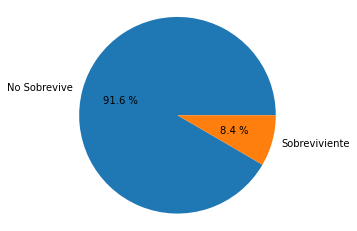

In [631]:
plt.pie([382,35], labels=['No Sobrevive', 'Sobreviviente'], autopct="%0.1f %%")
plt.axis("equal")
plt.show()